### Sentiment Analysis
#### AIT-526-DL1
#### Prof. M. Heidari
#### Team 2

This script performs sentiment analysis on tweets from different hashtags using the VADER library.

In [1]:
import pandas
import nltk
import string
import re
import spacy
import en_core_web_sm
from nltk.tokenize import RegexpTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# read in data
elonmusktwitter_raw = pandas.DataFrame(pandas.read_csv("Data/elonmusktwitter.csv"))
riptwitter_raw = pandas.DataFrame(pandas.read_csv("Data/riptwitter.csv"))
thankyouelonmusk_raw = pandas.DataFrame(pandas.read_csv("Data/ThankYouElonMusk.csv"))
twittertakeover_raw = pandas.DataFrame(pandas.read_csv("Data/twittertakeover.csv"))

Now that the data is read in, we can do a little cleaning by removing hashtags, URLs, and some tweets from bots.

In [2]:
# Remove bot tweets
not_bot_sources = ["Twitter for iPhone", "Twitter for Android", "Twitter Web App", "Twitter for iPad", 
                   "Flamingo for Android", "Twitterrific for Mac", "Twitterrific for iOS",
                  "Twitter Web Client", "Birdie for Twitter", "tweetcaster for Android", "Twitter Media Studio",
                  "TwitPaine for Android"]

elonmusktwitter = elonmusktwitter_raw[elonmusktwitter_raw['Source of Tweet'].isin(not_bot_sources)]
riptwitter = riptwitter_raw[riptwitter_raw['Source of Tweet'].isin(not_bot_sources)]
thankyouelonmusk = thankyouelonmusk_raw[thankyouelonmusk_raw['Source of Tweet'].isin(not_bot_sources)]
twittertakeover = twittertakeover_raw[twittertakeover_raw['Source of Tweet'].isin(not_bot_sources)]

In [3]:
# Keep only tweet data
elonmusktwitter = elonmusktwitter["Tweet"]
riptwitter = riptwitter["Tweet"]
thankyouelonmusk = thankyouelonmusk["Tweet"]
twittertakeover = twittertakeover["Tweet"]

# Remove URLs, random spaces, and hashtags
elonmusktwitter = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in elonmusktwitter]
elonmusktwitter = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in elonmusktwitter]
elonmusktwitter = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in elonmusktwitter]

riptwitter = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in riptwitter]
riptwitter = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in riptwitter]
riptwitter = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in riptwitter]

thankyouelonmusk = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in thankyouelonmusk]
thankyouelonmusk = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in thankyouelonmusk]
thankyouelonmusk = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in thankyouelonmusk]

twittertakeover = [re.sub(r"http\S+", "", item, flags=re.MULTILINE) for item in twittertakeover]
twittertakeover = [re.sub(r"\n", "", item, flags=re.MULTILINE) for item in twittertakeover]
twittertakeover = [re.sub(r"#\S+", "", item, flags=re.MULTILINE) for item in twittertakeover]

Now that the data is a bit cleaner, it's time to perform sentiment analysis on each tweet.

In [4]:
sid = SentimentIntensityAnalyzer()

def GetSentiment(data):
    sentiment_test = []
    for tweet in data:
        #text2 = ''.join(str(x) for x in tweet)
        sentiment_test.append(sid.polarity_scores(tweet))
    return sentiment_test


elonmusktwitter_sentiment = GetSentiment(elonmusktwitter)
riptwitter_sentiment = GetSentiment(riptwitter)
thankyouelonmusk_sentiment = GetSentiment(thankyouelonmusk)
twittertakeover_sentiment = GetSentiment(twittertakeover)

print(elonmusktwitter_sentiment[0:5])
print(riptwitter_sentiment[0:5])

[{'neg': 0.255, 'neu': 0.745, 'pos': 0.0, 'compound': -0.6249}, {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}, {'neg': 0.208, 'neu': 0.762, 'pos': 0.03, 'compound': -0.8271}, {'neg': 0.067, 'neu': 0.879, 'pos': 0.054, 'compound': -0.128}, {'neg': 0.126, 'neu': 0.874, 'pos': 0.0, 'compound': -0.6808}]
[{'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.69}, {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.69}, {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.69}, {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.69}, {'neg': 0.222, 'neu': 0.778, 'pos': 0.0, 'compound': -0.69}]


Visualize the data

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import statistics
import math

# Extract the compount scores and ratios for each tweet form the list of dictionaries for easier comparison
#ElonMuskTwitter
emt_compound = []
emt_pos = []
emt_neg = []
emt_neu = []
for tweet in elonmusktwitter_sentiment:
    emt_compound.append(tweet["compound"])
    emt_pos.append(tweet["pos"])
    emt_neg.append(tweet["neg"])
    emt_neu.append(tweet["neu"])

#RIPTwitter   
ript_compound = []
ript_pos = []
ript_neg = []
ript_neu = []
for tweet in riptwitter_sentiment:
    ript_compound.append(tweet["compound"])
    ript_pos.append(tweet["pos"])
    ript_neg.append(tweet["neg"])
    ript_neu.append(tweet["neu"])
    
#TwitterTakeover
tt_compound = []
tt_pos = []
tt_neg = []
tt_neu = []
for tweet in twittertakeover_sentiment:
    tt_compound.append(tweet["compound"])
    tt_pos.append(tweet["pos"])
    tt_neg.append(tweet["neg"])
    tt_neu.append(tweet["neu"])
    
#ThankYouElonMusk
tyem_compound = []
tyem_pos = []
tyem_neg = []
tyem_neu = []
for tweet in thankyouelonmusk_sentiment:
    tyem_compound.append(tweet["compound"])
    tyem_pos.append(tweet["pos"])
    tyem_neg.append(tweet["neg"])
    tyem_neu.append(tweet["neu"])

(0.0, 3090.0)

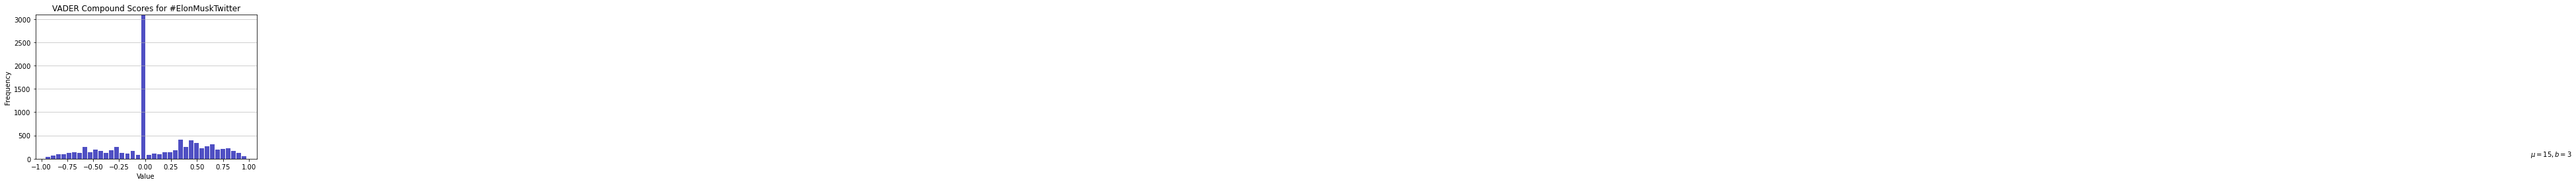

In [6]:
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=emt_compound, bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('VADER Compound Scores for #ElonMuskTwitter')
plt.text(23, 45, r'$\mu=15, b=3$')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)

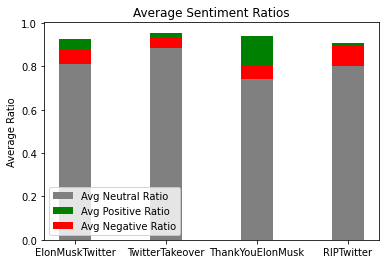

In [7]:
# Stacked bar chart code taken from https://matplotlib.org/stable/gallery/lines_bars_and_markers/bar_stacked.html
labels = ['ElonMuskTwitter', 'TwitterTakeover', 'ThankYouElonMusk', 'RIPTwitter']
emt_pos_mean = statistics.mean(emt_pos)
emt_neg_mean = statistics.mean(emt_neg)
emt_neu_mean = statistics.mean(emt_neu)
tt_pos_mean = statistics.mean(tt_pos)
tt_neg_mean = statistics.mean(tt_neg)
tt_neu_mean = statistics.mean(tt_neu)
tyem_pos_mean = statistics.mean(tyem_pos)
tyem_neg_mean = statistics.mean(tyem_neg)
tyem_neu_mean = statistics.mean(tyem_neu)
ript_pos_mean = statistics.mean(ript_pos)
ript_neg_mean = statistics.mean(ript_neg)
ript_neu_mean = statistics.mean(ript_neu)

pos_means = [emt_pos_mean, tt_pos_mean, tyem_pos_mean, ript_pos_mean]
neu_means = [emt_neu_mean, tt_neu_mean, tyem_neu_mean, ript_neu_mean]
neg_means = [emt_neg_mean, tt_neg_mean, tyem_neg_mean, ript_neg_mean]

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels, neu_means, width, label='Avg Neutral Ratio', color = 'gray')
ax.bar(labels, pos_means, width, label='Avg Positive Ratio', color = 'green', bottom=neu_means)
ax.bar(labels, neg_means, width, bottom=neu_means, label='Avg Negative Ratio', color = 'red')

ax.set_ylabel('Average Ratio')
ax.set_title('Average Sentiment Ratios')
ax.legend()

plt.show()
fig.savefig('Avg Sentient Ratios by Hashtag.jpg')

Since the values in the stacked bar chart are averages, they won't nicely add up to 1.0


In [8]:
print("The avg negative ratio for #ElonMuskTwitter is ", emt_neg_mean)
print("The avg neutral ratio for #ElonMuskTwitter is ", emt_neu_mean)
print("The avg positive ratio for #ElonMuskTwitter is ", emt_pos_mean)
print("The avg compound score for #ElonMuskTwitter is ", statistics.mean(emt_compound))

print("The avg negative ratio for #TwitterTakeover is ", tt_neg_mean)
print("The avg neutral ratio for #TwitterTakeover is ", tt_neu_mean)
print("The avg positive ratio for #TwitterTakeover is ", tt_pos_mean)
print("The avg compound score for #TwitterTakeover is ", statistics.mean(tt_compound))

print("The avg negative ratio for #ThankYouElonMusk is ", tyem_neg_mean)
print("The avg neutral ratio for #ThankYouElonMusk is ", tyem_neu_mean)
print("The avg positive ratio for #ThankYouElonMusk is ", tyem_pos_mean)
print("The avg compound score for #ThankYouElonMusk is ", statistics.mean(tyem_compound))

print("The avg negative ratio for #RIPTwitter is ", ript_neg_mean)
print("The avg neutral ratio for #RIPTwitter is ", ript_neu_mean)
print("The avg positive ratio for #RIPTwitter is ", ript_pos_mean)
print("The avg compound score for #RIPTwitter is ", statistics.mean(ript_compound))

The avg negative ratio for #ElonMuskTwitter is  0.07217624199138746
The avg neutral ratio for #ElonMuskTwitter is  0.8087834261107026
The avg positive ratio for #ElonMuskTwitter is  0.11904001680495746
The avg compound score for #ElonMuskTwitter is  0.0882370549312047
The avg negative ratio for #TwitterTakeover is  0.04478551741418191
The avg neutral ratio for #TwitterTakeover is  0.8864311367242963
The avg positive ratio for #TwitterTakeover is  0.06869782009521423
The avg compound score for #TwitterTakeover is  0.046021297920320725
The avg negative ratio for #ThankYouElonMusk is  0.06059339774557166
The avg neutral ratio for #ThankYouElonMusk is  0.742390499194847
The avg positive ratio for #ThankYouElonMusk is  0.1970112721417069
The avg compound score for #ThankYouElonMusk is  0.25293333333333334
The avg negative ratio for #RIPTwitter is  0.0927374358974359
The avg neutral ratio for #RIPTwitter is  0.8022416117216117
The avg positive ratio for #RIPTwitter is  0.10502021978021978
Th